##  Classification: Choose proper tutors for math exam

In this competition your task will be to predict the probability for a tutor to be a proper one for preparing for the math exam. - https://www.kaggle.com/c/choose-tutors/overview

#### Rules: You can only use these imports:

import numpy as np

import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import seaborn as sns





In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

### Обзор данных

In [2]:
df_train = pd.read_csv('C:/Users/yana/choose-tutors/train.csv')
df_test = pd.read_csv('C:/Users/yana/choose-tutors/test.csv')
predictions = pd.DataFrame()
predictions['Id'] = df_test['Id'].copy()

In [3]:
#пропуски
df_train.isnull().sum()

Id                     0
age                    0
years_of_experience    0
lesson_price           0
qualification          0
physics                0
chemistry              0
biology                0
english                0
geography              0
history                0
mean_exam_points       0
choose                 0
dtype: int64

In [4]:
#посмотрим типы данных
df_train.dtypes

Id                       int64
age                    float64
years_of_experience    float64
lesson_price           float64
qualification          float64
physics                float64
chemistry              float64
biology                float64
english                float64
geography              float64
history                float64
mean_exam_points       float64
choose                   int64
dtype: object

In [5]:
df_train['choose'].value_counts(normalize=True) #наблюдается дисбаланс между классами

0    0.8891
1    0.1109
Name: choose, dtype: float64

In [6]:
df_train.loc[df_train['choose']==0].describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
count,8891.000000,8891.000000,8891.000000,8891.000000,8891.000000,8891.000000,8891.000000,8891.000000,8891.000000,8891.000000,8891.000000,8891.000000,8891.0
mean,4987.222247,45.752221,1.956698,1727.229783,1.712406,0.337307,0.110899,0.109099,0.057249,0.027331,0.018221,63.909909,0.0
std,2894.744626,8.025319,1.756054,524.153146,0.791236,0.472817,0.314024,0.311781,0.232331,0.163055,0.133756,13.735075,0.0
min,0.000000,23.000000,0.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,0.0
25%,2471.500000,40.000000,0.000000,1350.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000,0.0
50%,4976.000000,46.000000,2.000000,1550.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,0.0
75%,7495.500000,51.000000,3.000000,2150.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000,0.0
max,9999.000000,68.000000,9.000000,3950.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,0.0


In [7]:
df_train.loc[df_train['choose']==1].describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
count,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.0
mean,5097.932372,46.191163,2.119928,1503.697024,1.819657,0.637511,0.206492,0.182146,0.073940,0.030658,0.016231,68.646528,1.0
std,2822.530435,8.062900,1.845829,476.524574,0.851804,0.480936,0.404971,0.386139,0.261792,0.172468,0.126419,11.589451,0.0
min,1.000000,23.000000,0.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.000000,1.0
25%,2694.000000,41.000000,0.000000,1200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,1.0
50%,5138.000000,46.000000,2.000000,1400.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000,1.0
75%,7531.000000,52.000000,3.000000,1800.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,76.000000,1.0
max,9968.000000,68.000000,8.000000,3000.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,98.000000,1.0


Заметно, что цена за урок среди выбранных учителей ниже, чем среди не выбранных. Также большинство выбранных учителей в отличие от не выбранных имеют знания по физике. Средние баллы экзамена среди выбранных учителей также выше

#### Обзор количественных признаков

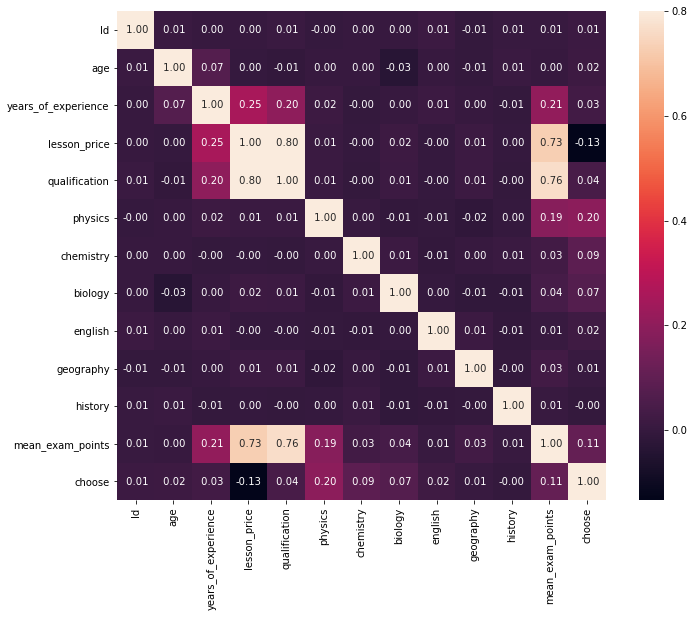

In [8]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(df_train.corr(), vmax=.8, annot=True, fmt=' .2f', square=True);

У признаков довольно слабая корреляция с таргетом. Среди остальных признаков есть значимая корреляция между lesson price, qualification и mean exam points

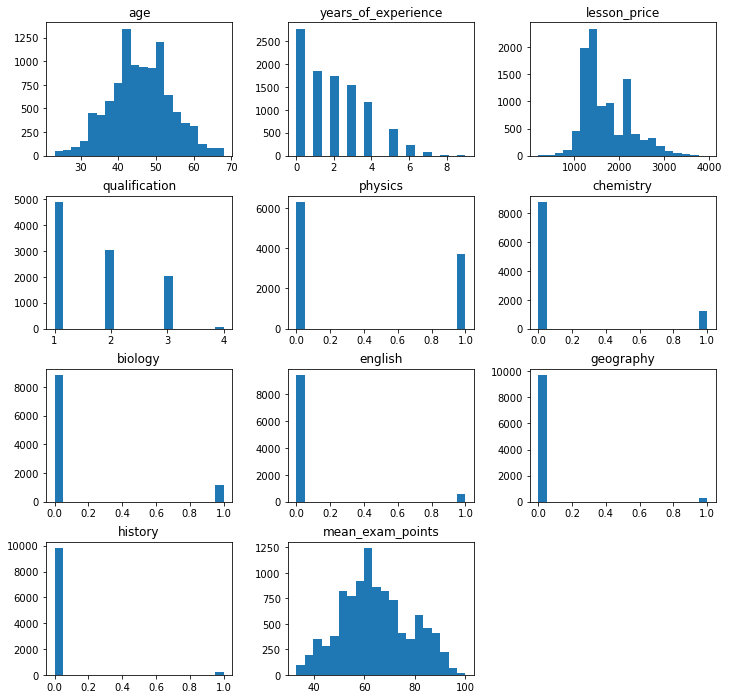

In [9]:
features = df_train.drop(['choose', 'Id'], axis=1, inplace=False)
features.hist(figsize=(12,12), bins=20, grid=False);

In [10]:
# уменьшение потребляемой памяти
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
#                 if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
#                     df[col] = df[col].astype(np.float16)
#                 elif

                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

## Подготовка данных и создание новых признаков

In [11]:
class Dataset:


        
    def fit(self, df):
        
        return self


        
    def transform(self, df):
        df = df.astype('int')

        df['lesson_price']=df['lesson_price']//100
        df['exper_price'] = np.log((df['qualification']+df['years_of_experience'])*df['lesson_price'])
        df['qual_price_deratio'] = df['qualification'] / df['lesson_price']
        #df['qual_price_ratio'] = df['qualification'] * df['lesson_price']
        df['points_price_ratio'] = df['mean_exam_points'] / df['lesson_price']
        df['experienced'] = df['years_of_experience']*df['qualification']
        df['long_good_practice'] = df['years_of_experience']*df['mean_exam_points']
        df['young_good_teacher'] = df['mean_exam_points'] / df['age']
        df['problem'] = 0
        df.loc[(df['lesson_price'] > 30) | (df['mean_exam_points'] < 47), 'problem'] = 1
        df.loc[(df['lesson_price'] > 24) & (df['mean_exam_points'] < 83) , 'problem'] = 1
        df['benefits'] = 0
        df.loc[df['lesson_price'] <=15, 'benefits'] +=1
        df.loc[df['mean_exam_points'] >=66, 'benefits'] +=1
        df['age'] = df['age']//10

        #df['price_per_point'] = df['lesson_price'] / df['mean_exam_points']
        
        df['other'] = df['chemistry']+df['biology']+ df['history']+ df['english']+ df['geography']
        df.drop(['Id', 'chemistry', 'biology', 'history', 'english', 'geography'], axis=1, inplace=True)

        
        return df

In [12]:
data = Dataset()
data.fit(df_train)
df_train = data.transform(df_train)
df_test = data.transform(df_test)

In [13]:
reduce_mem_usage(df_train)
reduce_mem_usage(df_test)

Memory usage of dataframe is 0.84 MB
Memory usage after optimization is: 0.28 MB
Decreased by 67.0%
Memory usage of dataframe is 0.80 MB
Memory usage after optimization is: 0.27 MB
Decreased by 66.7%


,age,years_of_experience,lesson_price,qualification,physics,mean_exam_points,exper_price,qual_price_deratio,points_price_ratio,experienced,long_good_practice,young_good_teacher,problem,benefits,other
0,3,2,27,3,0,90,4.905275,0.111111,3.333333,6,180,2.812500,0,1,0
1,3,6,18,2,1,71,4.969813,0.111111,3.944444,12,426,2.028571,0,1,1
2,4,2,12,1,0,45,3.583519,0.083333,3.750000,2,90,1.022727,1,1,0
3,4,4,29,3,1,92,5.313206,0.103448,3.172414,12,368,2.090909,0,1,0
4,3,3,14,2,1,58,4.248495,0.142857,4.142857,6,174,1.526316,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4,3,18,2,1,68,4.499810,0.111111,3.777778,6,204,1.545455,0,1,1
9996,4,3,24,2,1,72,4.787492,0.083333,3.000000,6,216,1.600000,0,1,2
9997,4,2,12,1,1,63,3.583519,0.083333,5.250000,2,126,1.431818,0,1,1
9998,5,5,10,2,1,64,4.248495,0.200000,6.400000,10,320,1.254902,0,1,1


In [14]:
X = df_train.drop(['choose'], axis=1, inplace=False).to_numpy()
y = df_train['choose'].to_numpy()
X_fin = df_test.to_numpy()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Random Forest Classifier

In [16]:
class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле
        
# И класс терминального узла (листа)

class Leaf:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        
    def predict(self):
        # подсчет количества объектов разных классов
        classes = {}  # сформируем словарь "класс: количество объектов"
        for label in self.labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1
        #  найдем класс, количество объектов которого будет максимальным в этом листе и вернем его    
        prediction = max(classes, key=classes.get)
        probability = classes[prediction]/ sum(classes.values())
        if prediction == 0:
            probability = 1-probability

        return prediction, probability

In [21]:
class Tree:
    
    def __init__(self, depth=6, min_leaf=6):
        self.depth = depth
        self.min_leaf = min_leaf
        self.tree = None
        
    def gini(self, labels):
    #  подсчет количества объектов разных классов
        classes = {}
        for label in labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1
    
        #  расчет критерия
        impurity = 1
        for label in classes:
            p = classes[label] / len(labels)
            impurity -= p ** 2
        
        return impurity


    def quality(self, left_labels, right_labels, current_gini):

        # доля выбоки, ушедшая в левое поддерево
        p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
        return current_gini - p * self.gini(left_labels) - (1 - p) * self.gini(right_labels)


    # Разбиение датасета в узле

    def split(self, data, labels, index, t):
    
        left = np.where(data[:, index] <= t)
        right = np.where(data[:, index] > t)
        
        true_data = data[left]
        false_data = data[right]
        true_labels = labels[left]
        false_labels = labels[right]
        
        return true_data, false_data, true_labels, false_labels


    # Нахождение наилучшего разбиения

    def find_best_split(self, data, labels):
    
        #  обозначим минимальное количество объектов в узле

        current_gini = self.gini(labels)

        best_quality = 0
        best_t = None
        best_index = None
    
        n_features = data.shape[1]
    
        # выбор индекса из подвыборки длиной sqrt(n_features)
        subsample = self.get_subsample(n_features)
    
        for index in range(n_features):
        # будем проверять только уникальные значения признака, исключая повторения
            t_values = np.unique([row[index] for row in data])
        
            for t in t_values:
                true_data, false_data, true_labels, false_labels = self.split(data, labels, index, t)
                #  пропускаем разбиения, в которых в узле остается менее 5 объектов
                if len(true_data) < self.min_leaf or len(false_data) < self.min_leaf:
                    continue
            
                current_quality = self.quality(true_labels, false_labels, current_gini)
            
                #  выбираем порог, на котором получается максимальный прирост качества
                if current_quality > best_quality:
                    best_quality, best_t, best_index = current_quality, t, index

        return best_quality, best_t, best_index

    def get_subsample(self, len_sample):
        # будем сохранять не сами признаки, а их индексы
        sample_indexes = [i for i in range(len_sample)]
    
        len_subsample = int(np.sqrt(len_sample))
        subsample = []
    
        np.random.shuffle(sample_indexes)
        for _ in range(len_subsample):
            subsample.append(sample_indexes.pop())
        
        return subsample


    # Построение дерева с помощью рекурсивной функции

    def fit(self, data, labels, depth=-1):
        if depth==-1:
            depth = self.depth
        quality, t, index = self.find_best_split(data, labels)

        #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
        if quality == 0:
            return Leaf(data, labels)
    
        # ограничение глубины
        if depth ==0:
            return Leaf(data, labels)

        true_data, false_data, true_labels, false_labels = self.split(data, labels, index, t)

        # Рекурсивно строим два поддерева
        depth -=1
        true_branch = self.fit(true_data, true_labels, depth)
        false_branch = self.fit(false_data, false_labels, depth)

        # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
        self.tree = Node(index, t, true_branch, false_branch)
        return Node(index, t, true_branch, false_branch)



    def classify_object(self, obj, node):

        #  Останавливаем рекурсию, если достигли листа
        if isinstance(node, Leaf):
            answer = node.prediction
            return answer

        if obj[node.index] <= node.t:
            return self.classify_object(obj, node.true_branch)
        else:
            return self.classify_object(obj, node.false_branch)
    
    
    def predict(self, data):
    
        classes = []
        proba = []
        for obj in data:
            prediction, probability = self.classify_object(obj, self.tree)
            classes.append(prediction)
            proba.append(probability)
        return classes, proba
        
    

In [22]:
class Random_Forest:
    
    def __init__(self, n_trees, depth, min_leaf):
        self.n_trees = n_trees
        self.depth = depth
        self.min_leaf = min_leaf
        self.forest = None
    

    def fit(self, data, labels):
        forest = []
        bootstrap = self.get_bootstrap(data, labels)
    
        for b_data, b_labels, mask in bootstrap:
            cur_tree = Tree(self.depth, self.min_leaf)
            cur_tree.fit(b_data, b_labels)
            predictions = cur_tree.predict(data[mask, :])
            oobs = self.balanced_accuracy_metric(labels[mask], predictions[0])
            cur_tree.oobs =oobs
            forest.append(cur_tree)
        self.forest = forest
        
        return forest

    def get_bootstrap(self, data, labels):
        n_samples = data.shape[0]
        bootstrap = []
        
        for i in range(self.n_trees):
            mask = np.ones(labels.shape, dtype=bool)
            indexes = np.random.randint(0, n_samples-1, size=labels.shape)
            mask[indexes]=False
            bootstrap.append((data[indexes, :], labels[indexes], mask))

        return bootstrap

    @staticmethod
    def accuracy_metric(actual, predicted):
        return np.sum(actual==predicted)/len(actual)
    
    @staticmethod
    def balanced_accuracy_metric(actual, predicted):
        true_predicted=(actual==predicted).astype(int)
        sensitivity=np.sum(actual*true_predicted)/np.sum(actual==1)
        specificity=np.sum((1-actual)*true_predicted)/np.sum(actual==0)
        return 0.5*(sensitivity+specificity)    

    def predict(self, data):

        # добавим предсказания всех деревьев в список
        predictions = []
        proba = []
        oobs = []
        for tree in self.forest:
            predictions.append(tree.predict(data)[0])
            proba.append(tree.predict(data)[1])
            oobs.append(tree.oobs)
        
        idx = np.where(np.array(oobs) > np.quantile(oobs, q=0.2))
        #print(idx)
        proba = np.array(proba)
        proba = proba[idx]
    
        # сформируем список с предсказаниями для каждого объекта
        proba_per_object = list(zip(*proba))
    
        # выберем в качестве итогового предсказания для каждого объекта то,
        # за которое проголосовало большинство деревьев
        voted_proba = []
        for obj in proba_per_object:
             voted_proba.append(np.mean(obj))
                
        return voted_proba

## Обучение модели и оценка результата

In [23]:
my_forest = Random_Forest(n_trees = 10, depth=6, min_leaf=6)

In [24]:
my_forest.fit(X_train, y_train)

In [25]:
train_answers = my_forest.predict(X_train)
test_answers = my_forest.predict(X_test)

In [26]:
def roc_auc(y, proba):
    
    df_proba = pd.DataFrame({'proba': proba, 'y': y})
    df_proba = df_proba.sort_values('proba', ascending=False).reset_index(drop=True)

    N = len(y)
    n_pos = np.count_nonzero(y)
    n_neg = N - n_pos
    TP = 0
    FP = 0
    TPR = [0]
    FPR = [0]
    for i in range(N):
        if df_proba.iloc[i, 1] == 1:
            TP += 1
        else:
            FP += 1
        TPR.append(TP / n_pos)
        FPR.append(FP / n_neg)
    ROC_AUC = np.trapz(TPR, x=FPR, dx=0.1)

    plt.figure(figsize=(8, 8))
    plt.plot(FPR, TPR, color='r', linewidth=2,
             label=f'ROC_AUC = {round(ROC_AUC, 5)}')
    plt.plot((0, 1), (0, 1), color='black',
             linewidth=1, linestyle='dashed')
    plt.legend(loc='right')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
 
    plt.show()

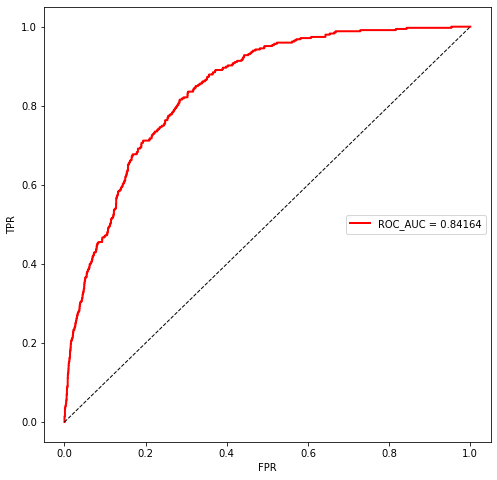

In [27]:
roc_auc(y_test, test_answers)

In [28]:
n_trees = 165
my_forest = Random_Forest(n_trees = 165, depth=6, min_leaf=6)

In [29]:
my_forest.fit(X, y)

In [30]:
train_answers = my_forest.predict(X)
test_answers = my_forest.predict(X_fin)

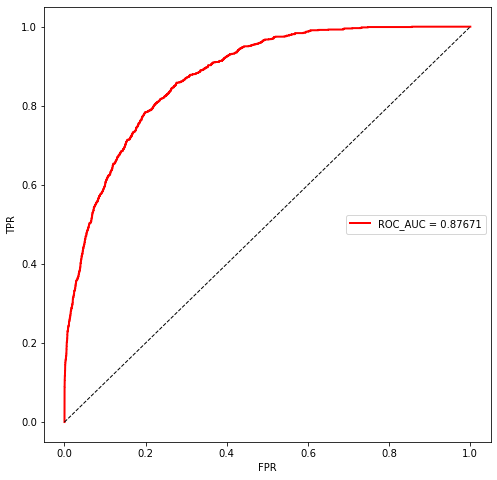

In [31]:
roc_auc(y, train_answers)

In [32]:
predictions['choose'] = test_answers
predictions.to_csv('./predictions_classification.csv', index=False, encoding='utf-8', sep=',')
predictions.head(6)

,Id,choose
0,10000,0.030873
1,10001,0.125771
2,10002,0.013376
3,10003,0.010218
4,10004,0.209597
5,10005,0.503626
